#final code

IntSlider(value=100, description='Nodes:', max=500, min=50, step=50)

FloatSlider(value=0.05, description='Edge Prob:', max=0.2, min=0.01, step=0.01)

FloatSlider(value=0.3, description='Infection Prob:', max=0.5, min=0.1, step=0.05)

FloatSlider(value=0.3, description='Recovery Prob:', max=0.5, min=0.05, step=0.05)

IntSlider(value=200, description='Time Steps:', max=500, min=50, step=50)

FloatSlider(value=0.1, description='Indiv Learn:', max=0.5, step=0.05)

FloatSlider(value=0.2, description='Antivirus Effect:', max=1.0)

FloatSlider(value=0.4, description='Threshold:', max=0.6, min=0.2, step=0.05)

Button(description='Run Simulation', style=ButtonStyle())

=== DAY 0 ===
Nodes: 100, Edge Probability: 0.05
Initial Infection Probability: 0.3
Recovery Probability: 0.3
Individual Learning Effect: 0.1
Antivirus Update Effect: 0.2
Learning Threshold: 40.0% of the network
Initial Infected Nodes: 5 (5.00%)


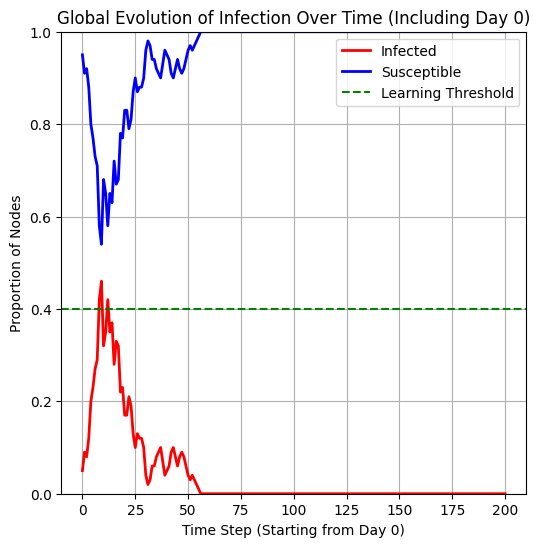

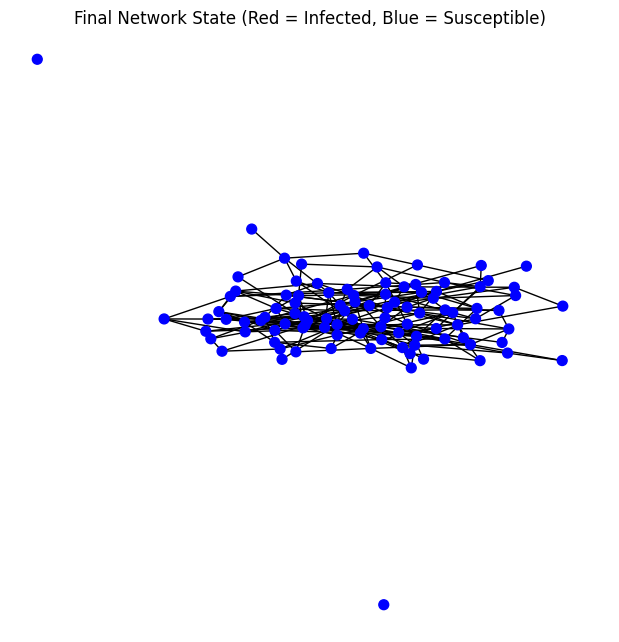

Final Infected Proportion: 0.00%
Final Susceptible Proportion: 100.00%


In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
from IPython.display import display

def run_simulation(num_nodes, edge_prob, infection_prob, recovery_prob, time_steps,
                   indiv_learning_effect, antivirus_update_effect, learning_threshold):

    # Network creation
    G = nx.erdos_renyi_graph(num_nodes, edge_prob)
    state = {node: 0 for node in G.nodes()}  # 0 = Susceptible, 1 = Infected
    infection_probabilities = {node: infection_prob for node in G.nodes()}  # Probability of node infection

    # Initial infection (1 to 5 infected nodes)
    infected_nodes = random.sample(list(G.nodes()), random.randint(1, 5))
    for node in infected_nodes:
        state[node] = 1

    recovery_prob_current = recovery_prob  # probability of recovery

    infected_ratios = []
    susceptible_ratios = []

    # === DAY 0: Initial conditions ===
    initial_infected_ratio = sum(state.values()) / num_nodes
    initial_susceptible_ratio = 1 - initial_infected_ratio

    print(f"=== DAY 0 ===")
    print(f"Nodes: {num_nodes}, Edge Probability: {edge_prob}")
    print(f"Initial Infection Probability: {infection_prob}")
    print(f"Recovery Probability: {recovery_prob}")
    print(f"Individual Learning Effect: {indiv_learning_effect}")
    print(f"Antivirus Update Effect: {antivirus_update_effect}")
    print(f"Learning Threshold: {learning_threshold * 100}% of the network")
    print(f"Initial Infected Nodes: {len(infected_nodes)} ({initial_infected_ratio * 100:.2f}%)")
    print("=" * 30)

    infected_ratios.append(initial_infected_ratio)
    susceptible_ratios.append(initial_susceptible_ratio)

    total_recoveries = 0  # Total recoveries

    # === update function ===
    def update():
        nonlocal recovery_prob_current, total_recoveries
        new_infected = []
        recovered_count = 0

        for node in G.nodes():
            if state[node] == 1:  # If the node is infected
                for neighbor in G.neighbors(node):
                    if state[neighbor] == 0 and random.random() < infection_probabilities[neighbor]:
                        new_infected.append(neighbor)

                # recovery process
                if random.random() < recovery_prob_current:
                    state[node] = 0  # The node recovers
                    recovered_count += 1
                    total_recoveries += 1
                    # Individual learning: reduced likelihood of infection
                    infection_probabilities[node] = max(0, infection_probabilities[node] * (1 - indiv_learning_effect))

        for node in new_infected:
            state[node] = 1  # Infection of neighbours

        # Global Learning (Update recovery with the correct formula)
        infected_count = sum(state.values())
        recovery_prob_current = min(1, recovery_prob**(antivirus_update_effect))

        return infected_count

    # === simulation loop ===
    for t in range(1, time_steps + 1):
        num_infected = update()
        infected_ratios.append(num_infected / num_nodes)
        susceptible_ratios.append(1 - infected_ratios[-1])

    # === Graph of the course of infection ===
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(range(len(infected_ratios)), infected_ratios, label="Infected", color="red", linestyle='-', linewidth=2)
    ax.plot(range(len(susceptible_ratios)), susceptible_ratios, label="Susceptible", color="blue", linestyle='-', linewidth=2)

    # Added global learning threshold
    ax.axhline(y=learning_threshold, color='green', linestyle='--', label="Learning Threshold")

    ax.set_xlabel("Time Step (Starting from Day 0)")
    ax.set_ylabel("Proportion of Nodes")
    ax.set_ylim(0, 1)
    ax.legend()
    ax.set_title("Global Evolution of Infection Over Time (Including Day 0)")
    ax.grid()
    plt.show()

    # === Final display of network status ===
    plt.figure(figsize=(6, 6))
    node_colors = ["red" if state[node] == 1 else "blue" for node in G.nodes()]
    nx.draw(G, node_color=node_colors, with_labels=False, node_size=50)
    plt.title("Final Network State (Red = Infected, Blue = Susceptible)")
    plt.show()

    # === final statistics ===
    final_infected = infected_ratios[-1] * 100
    final_susceptible = susceptible_ratios[-1] * 100
    print(f"Final Infected Proportion: {final_infected:.2f}%")
    print(f"Final Susceptible Proportion: {final_susceptible:.2f}%")

# === interactive UI ===
num_nodes_slider = widgets.IntSlider(value=100, min=50, max=500, step=50, description='Nodes:')
edge_prob_slider = widgets.FloatSlider(value=0.05, min=0.01, max=0.2, step=0.01, description='Edge Prob:')
infection_prob_slider = widgets.FloatSlider(value=0.3, min=0.1, max=0.5, step=0.05, description='Infection Prob:')
recovery_prob_slider = widgets.FloatSlider(value=0.3, min=0.05, max=0.5, step=0.05, description='Recovery Prob:')
time_steps_slider = widgets.IntSlider(value=200, min=50, max=500, step=50, description='Time Steps:')

indiv_learning_slider = widgets.FloatSlider(value=0.1, min=0, max=0.5, step=0.05, description='Indiv Learn:')
global_learning_slider = widgets.FloatSlider(value=0.2, min=0, max=1, step=0.1, description='Antivirus Effect:')
threshold_slider = widgets.FloatSlider(value=0.4, min=0.2, max=0.6, step=0.05, description='Threshold:')

run_button = widgets.Button(description="Run Simulation")

# Launch the simulation with the
def on_button_click(b):
    run_simulation(num_nodes_slider.value, edge_prob_slider.value, infection_prob_slider.value,
                   recovery_prob_slider.value, time_steps_slider.value,
                   indiv_learning_slider.value, global_learning_slider.value, threshold_slider.value)

run_button.on_click(on_button_click)

# viewing widgets
display(num_nodes_slider, edge_prob_slider, infection_prob_slider, recovery_prob_slider, time_steps_slider,
        indiv_learning_slider, global_learning_slider, threshold_slider, run_button)
